In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
from tensorflow.keras.layers import Conv2D, Input, Dense, Dropout, Flatten, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()
x_train, x_test = x_train/255, x_test/255
y_train, y_test = y_train.flatten(), y_test.flatten()
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
K = len(set(y_train.flatten()))

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

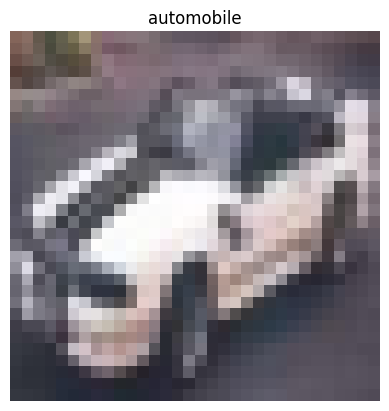

In [ ]:
ind = np.random.choice(range(50000))
plt.imshow(x_train[ind])
plt.title(classes[y_train[ind]])
plt.axis(False);

In [ ]:
i = Input(shape= x_train[0].shape)
x = Conv2D(64, (3,3), activation = "relu", padding= "same")(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = "relu", padding= "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.20)(x)
# 2nd set
x = Conv2D(128, (3,3), activation = "relu", padding= "same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = "relu", padding= "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.20)(x)
#3rd set
x = Conv2D(256, (3,3), activation = "relu", padding= "same")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = "relu", padding= "same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.20)(x)
x = Flatten()(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i,x)

In [ ]:
# batch augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)

In [ ]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

r = model.fit(train_generator, validation_data = (x_test, y_cat_test), epochs = 50, callbacks = [EarlyStopping(monitor="val_accuracy", patience=5)])

Epoch 1/50
1563/1563 [==============================] - 49s 26ms/step - loss: 1.5901 - accuracy: 0.4625 - val_loss: 1.9478 - val_accuracy: 0.4073
Epoch 2/50
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0483 - accuracy: 0.6369 - val_loss: 1.4248 - val_accuracy: 0.5641
Epoch 3/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8809 - accuracy: 0.7008 - val_loss: 1.0463 - val_accuracy: 0.6748
Epoch 4/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7737 - accuracy: 0.7367 - val_loss: 0.8767 - val_accuracy: 0.7259
Epoch 5/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7002 - accuracy: 0.7658 - val_loss: 0.7354 - val_accuracy: 0.7560
Epoch 6/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6361 - accuracy: 0.7854 - val_loss: 0.6430 - val_accuracy: 0.7945
Epoch 7/50
1563/1563 [==============================] - 38s 25ms/step - loss: 0.5945 - accuracy: 0.8008 - val_loss: 0.6252 -

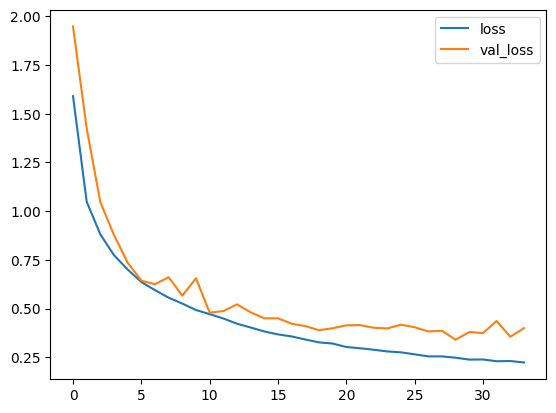

In [ ]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

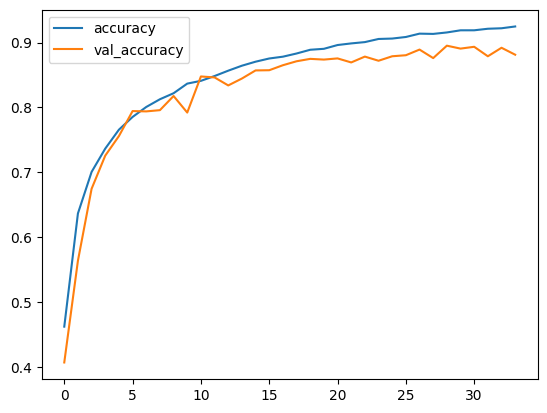

In [ ]:
plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend();

In [ ]:
y_pred = model.predict(x_test).argmax(axis = 1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_cat_test

3

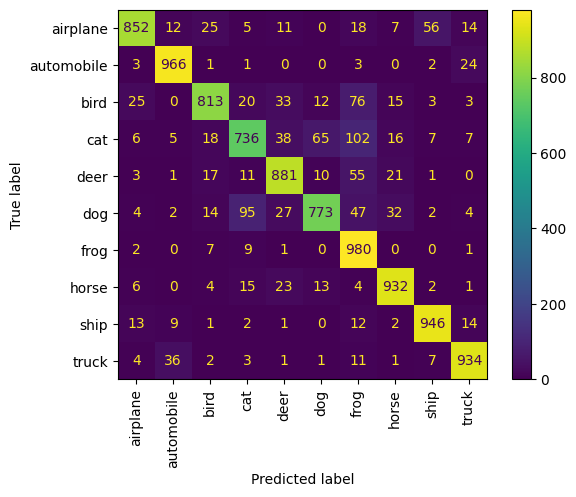

In [ ]:
cm = confusion_matrix(y_cat_test, y_pred)
matrix = ConfusionMatrixDisplay(cm, display_labels = classes)
matrix.plot(xticks_rotation = "vertical");

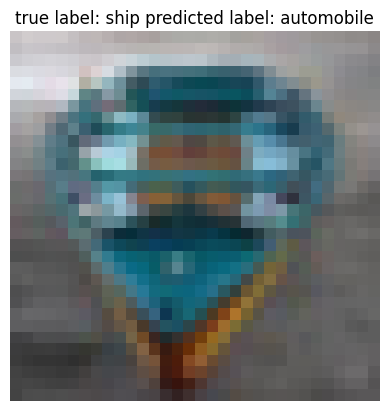

In [ ]:
wrongIdx = np.where(y_cat_test != y_pred)[0]
idx = np.random.choice(wrongIdx)
plt.imshow(x_test[idx])
plt.title(f"true label: {classes[y_cat_test[idx]]} predicted label: {classes[y_pred[idx]]}")
plt.axis(False);